# Running PCRGlobWB using the eWaterCycle system

This notebook assumes you have a working model configuration available on your system. We will use the example data from https://github.com/UU-Hydro/PCR-GLOBWB_input_example and we will user `ewatercycle.parametersetdb` to copy it to our local directory.

The default ini file contains a number of paths. Under `globalOptions`, the `input_dir` and `output_dir` will be overwritten on setup. All other paths must be relative to the `input_dir`, or they can be specified as absolute paths. If absolute paths are used in the config file, these directories must be passed during setup using the `additional_input_dirs` argument.

In [1]:
from ewatercycle.parametersetdb import build_from_urls

# Obtain an example case for testing the model
parameterset = build_from_urls(
    config_format='ini', config_url='https://raw.githubusercontent.com/UU-Hydro/PCR-GLOBWB_input_example/master/ini_and_batch_files_for_pcrglobwb_course/rhine_meuse_30min_using_input_example/setup_natural_test.ini',
    datafiles_format='svn', datafiles_url='https://github.com/UU-Hydro/PCR-GLOBWB_input_example/trunk/RhineMeuse30min',
)
parameterset.save_datafiles('./pcrglobwb_example_case')
parameterset.save_config('./pcrglobwb_example_case/setup.ini')

This notebook uses the following docker and/or singularity images. Make sure these are present on the system:

- Docker: `ewatercycle/pcrg-grpc4bmi:setters`
- Singularity: `ewatercycle-pcrg-grpc4bmi-setters.sif`


In [2]:
from ewatercycle import CFG
from ewatercycle.models import PCRGlobWB

In [3]:
# My default is set to docker. To test with singularity:
# CFG['container_engine'] = 'singularity'

In [4]:
pcrglob = PCRGlobWB()

In [5]:
pcrglob.parameters

NotImplementedError: No default parameters available for pcrglobwb. To see the parameters, first run setup with a valid .ini file.

In [6]:
?pcrglob.setup

Signature:
pcrglob.setup(
    input_dir: os.PathLike,
    cfg_file: os.PathLike,
    additional_input_dirs: Iterable[os.PathLike] = [],
    **kwargs,
) -> Tuple[os.PathLike, os.PathLike]
Docstring:
Start model inside container and return config file and work dir.

Args:

    - input_dir: main input directory. Relative paths in the cfg_file
    should start from this directory.

    - cfg_file: path to a valid pcrglobwb configuration file,
    typically somethig like `setup.ini`.

    - additional_input_dirs: one or more additional data directories
    that the model will have access to.

    - **kwargs (optional, dict): any settings in the cfg_file that you
    want to overwrite programmatically. Should be passed as a dict,
    e.g. `meteoOptions = {"temperatureNC": "era5_tas_1990_2000.nc"}`
    where meteoOptions is the section in which the temperatureNC option
    may be found.

Returns: Path to config file and work dir
File:      ~/ewatercycle/ewatercycle/ewatercycle/models/pcrglobw

In [8]:
cfg_file, cfg_dir = pcrglob.setup(input_dir="pcrglobwb_example_case/", cfg_file="pcrglobwb_example_case/setup.ini")
cfg_file, cfg_dir

Created working directory: /home/peter/ewatercycle/ewatercycle/examples/pcrglobwb_20210419_120714
Created config file /home/peter/ewatercycle/ewatercycle/examples/pcrglobwb_20210419_120714/pcrglobwb_ewatercycle.ini with inputDir /home/peter/ewatercycle/ewatercycle/examples/pcrglobwb_example_case and outputDir /home/peter/ewatercycle/ewatercycle/examples/pcrglobwb_20210419_120714.
Started model container with working directory /home/peter/ewatercycle/ewatercycle/examples/pcrglobwb_20210419_120714 and access to the following input directories:
/home/peter/ewatercycle/ewatercycle/examples/pcrglobwb_example_case.


(PosixPath('/home/peter/ewatercycle/ewatercycle/examples/pcrglobwb_20210419_120714/pcrglobwb_ewatercycle.ini'),
 PosixPath('/home/peter/ewatercycle/ewatercycle/examples/pcrglobwb_20210419_120714'))

In [9]:
pcrglob.parameters

[('globalOptions.inputDir',
  '/home/peter/ewatercycle/ewatercycle/examples/pcrglobwb_example_case'),
 ('globalOptions.cloneMap', 'cloneMaps/RhineMeuse30min.map'),
 ('globalOptions.landmask', 'None'),
 ('globalOptions.outputDir',
  '/home/peter/ewatercycle/ewatercycle/examples/pcrglobwb_20210419_120714'),
 ('globalOptions.spinUpOutputDir', 'True'),
 ('globalOptions.institution',
  'Department of Physical Geography, Utrecht University'),
 ('globalOptions.title', 'PCR-GLOBWB output'),
 ('globalOptions.description', 'test version (by Edwin H. Sutanudjaja)'),
 ('globalOptions.startTime', '2001-01-01'),
 ('globalOptions.endTime', '2010-12-31'),
 ('globalOptions.maxSpinUpsInYears', '20'),
 ('globalOptions.minConvForSoilSto', '0.5'),
 ('globalOptions.minConvForGwatSto', '0.5'),
 ('globalOptions.minConvForChanSto', '0.5'),
 ('globalOptions.minConvForTotlSto', '0.5'),
 ('meteoOptions.precipitationNC', 'forcing/precipitation_2001to2010.nc'),
 ('meteoOptions.temperatureNC', 'forcing/temperature_2

In [10]:
pcrglob.initialize(str(cfg_file))

In [11]:
pcrglob.output_var_names

('groundwater_recharge',
 'lake_and_reservoir_storage',
 'domesticWaterConsumptionVolume',
 'land_surface_actual_evaporation',
 'groundwater_storage',
 'snow_melt',
 'totalPotentialMaximumGrossDemand',
 'interception_evaporation',
 'total_groundwater_abstraction',
 'water_body_actual_evaporation',
 'interflow',
 'non_irrigation_gross_demand_volume',
 'livestock_water_withdrawal',
 'land_surface_potential_evaporation',
 'total_groundwater_storage',
 'bare_soil_evaporation',
 'top_water_layer_evaporation',
 'transpiration_from_irrigation',
 'total_thickness_of_active_water_storage',
 'domestic_water_withdrawal',
 'netLqWaterToSoil_at_irrigation_volume',
 'interception_storage',
 'non_irrigation_gross_demand',
 'livestockWaterConsumptionVolume',
 'surface_water_storage',
 'irrigation_gross_demand_volume',
 'upper_soil_storage',
 'desalination_source_abstraction_volume',
 'snow_free_water_evaporation',
 'surface_water_abstraction',
 'industryWaterConsumptionVolume',
 'fossil_groundwater_st

In [12]:
pcrglob.get_value("discharge")

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,
        0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0., nan,
       nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,
        0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan,
       nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan,  0.,
       nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0., na

In [13]:
pcrglob.get_value_as_xarray("discharge")

<xarray.DataArray 'discharge' (latitude: 13, longitude: 17)>
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,
        nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,
        nan, nan, nan, nan],
       [nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        nan, nan, nan, nan],
       [nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        nan,  0., nan, nan],
       [nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.],
       [nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., nan],
       [nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan,
        nan, nan, nan, nan],
       [nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan,
        nan, nan, nan, nan],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan,
        nan, nan, nan, nan],
       [nan,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan]])
Coordinates:
  * longitude  (longitude) float64 3.75 4.25 4.75 5.25 ... 10.75 11.25 11.75
  * latitude   (latitude) float64 46.25 46.75 47.25 47.75 ... 51.25 51.75 52.25
    time       object 2000-12-31 00:00:00
Attributes:
    units:    m3.s-1

In [14]:
# Run the model for a few steps and show progress every tenth step
for i in range(100):
    if i % 10 == 0:
        print(pcrglob.time)
    pcrglob.update()

36524.0
36534.0
36544.0
36554.0
36564.0
36574.0
36584.0
36594.0
36604.0
36614.0


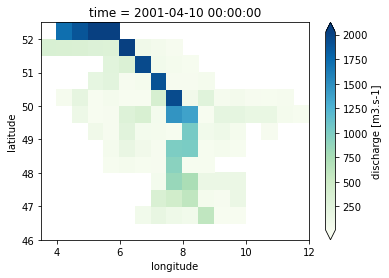

In [15]:
da = pcrglob.get_value_as_xarray("discharge")
da.plot(robust=True, cmap='GnBu')